In [10]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
plt.rcParams['figure.figsize'] = (15,7.5)

#read the data
data = pd.read_csv('headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [11]:
#mean of X and Y values
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values
#calculate mean
mean_x = np.mean(X)
mean_y = np.mean(Y)

#total values
m = len(X)

#calculating b1 and b0 (m and c in y=mx+c)
numerator = 0
denominator = 0

for i in range(m):
  numerator += (X[i] - mean_x) * (Y[i] - mean_y)
  denominator += (X[i] - mean_x) ** 2
b1 = numerator/denominator
b0 = mean_y - (b1 * mean_x)

#print coefficients
print(b1, b0)

0.26342933948939945 325.57342104944223


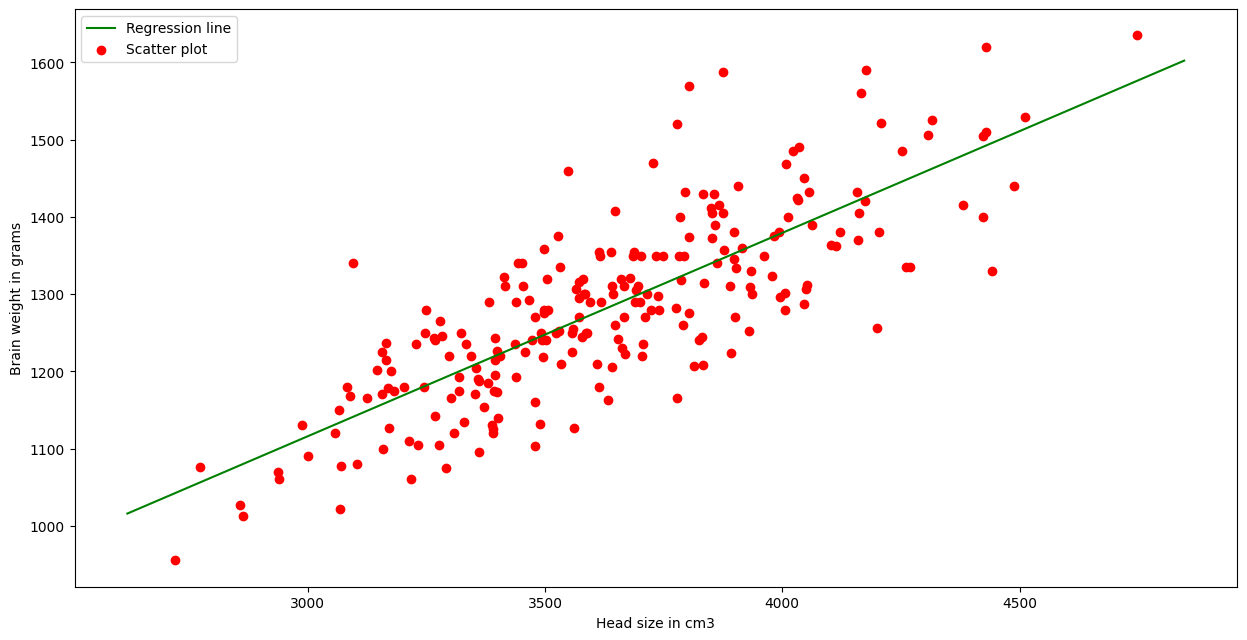

In [12]:
#plotting points and the regression line
max_x = np.max(X) + 100
min_x = np.min(X) - 100

#calculating line values of x and y
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x

#plotting line
plt.plot(x, y, color='green', label='Regression line')

#plotting scatter points
plt.scatter(X, Y, color='red', label='Scatter plot')
plt.xlabel('Head size in cm3')
plt.ylabel('Brain weight in grams')
plt.legend()
plt.show()

In [13]:
ss_t = 0
ss_r = 0
for i in range(m):
  y_pred = b0 + b1 * X[i]
  ss_t += (Y[i] - mean_y) ** 2
  ss_r += (Y[i] - y_pred) ** 2
r2 = 1- (ss_r / ss_t)
print(r2)

0.6393117199570003


In [14]:
#using scikit-learn implementing linear regression
X = X.reshape((m, 1))
#creating model
reg = LinearRegression()
#fitting training data
reg = reg.fit(X, Y)
#Y prediction
Y_pred = reg.predict(X)
#calculate score
r2_score = reg.score(X, Y)
print(r2_score)


0.639311719957
